# Importing the Required Libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import numpy as np
import pandas as pd

# Importing the Image and Plotting it

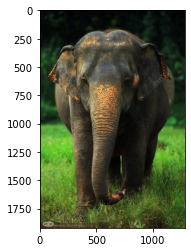

In [2]:
im = cv2.imread('C:/Users/jaiga/Desktop/Asian-Elephant.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

# Preprocessing the image to run it on Kmeans Classifier with 4 main colors

In [3]:
all_pixels = im.reshape((-1,3))
all_pixels.shape

(2457600, 3)

In [4]:
dominant_colors = 4
kmeans = KMeans(n_clusters=dominant_colors)
kmeans.fit(all_pixels)

KMeans(n_clusters=4)

In [5]:
centers = kmeans.cluster_centers_

# Getting the 4 Colors and Visualizing them

In [6]:
centers = np.array(centers, dtype='uint8')
centers

array([[152, 133,  96],
       [ 21,  26,  17],
       [104, 166,  53],
       [ 72,  78,  45]], dtype=uint8)

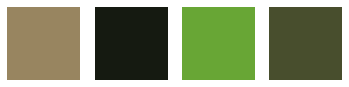

In [7]:
i = 1
for col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i += 1
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = col
    plt.imshow(a)

# Final Segmented Image

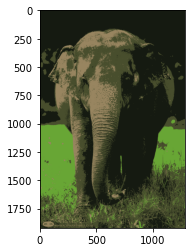

In [8]:
new_img = np.zeros(all_pixels.shape, dtype='uint8')
labels = kmeans.labels_
for i in range(new_img.shape[0]):
    pix = centers[labels[i]]
    new_img[i] = pix
plt.imshow(new_img.reshape(im.shape))